### This will be used to understand how much variance there is in positions played between players over the seasons

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from UtilFunctions import format_season

In [10]:
dfs = {}
for season in range (1997, 2024):
    first_year, second_year = format_season(season)
    df = pd.read_csv(f'DataCollection/Player_Time_By_Position/player_time_by_position_{first_year}-{second_year}.csv')
    dfs[season] = df


In [11]:
def calculate_positional_entropy(row):
    """Calculates the entropy of a player's position distribution."""
    positions = ['PG%', 'SG%', 'SF%', 'PF%', 'C%']
    percentages = [row[pos] / 100 for pos in positions]  # Normalize to proportions
    return entropy(percentages, base=2)

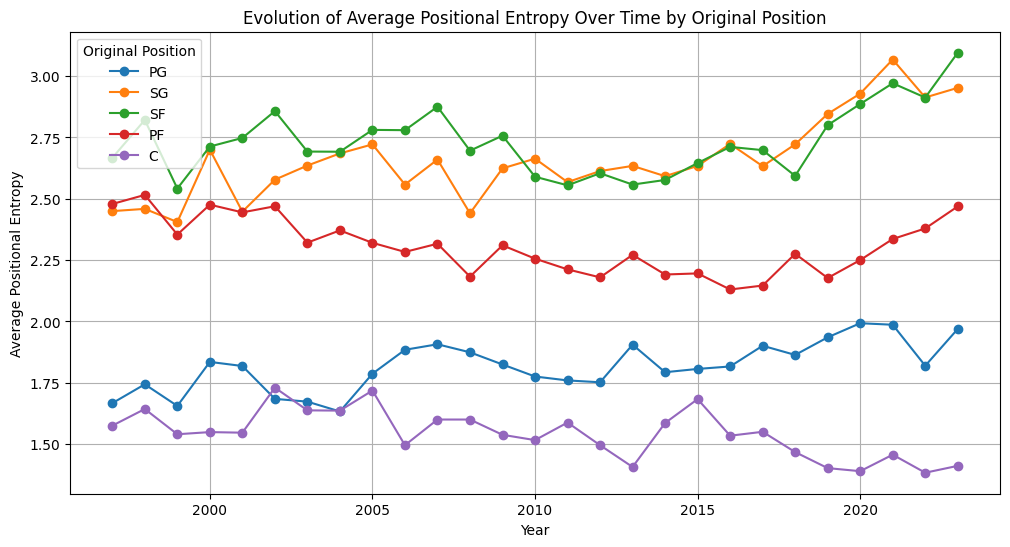

In [12]:
original_positions = {}
for year, df in dfs.items():
    for player in df['Player'].unique():
        if player not in original_positions:
            # Get the first position listed for the player
            original_positions[player] = df[df['Player'] == player]['Pos'].iloc[0]

# Calculate average positional entropy for each year, grouped by original position
yearly_entropy = {}
for year, df in dfs.items():
    df['PositionalEntropy'] = df.apply(calculate_positional_entropy, axis=1)
    df['OriginalPosition'] = df['Player'].map(original_positions)  # Map original position to each row
    grouped = df.groupby('OriginalPosition')['PositionalEntropy'].mean()
    yearly_entropy[year] = grouped

# Create a DataFrame from the yearly entropy data
entropy_df = pd.DataFrame(yearly_entropy)
entropy_df.index.name = 'Original Position'

# Plot the average positional entropy over time for each original position
plt.figure(figsize=(12, 6))
position_order = ['PG', 'SG', 'SF', 'PF', 'C']

for position in position_order:
    if position in avg_positions_df.index:
        plt.plot(avg_positions_df.columns, avg_positions_df.loc[position], marker='o', label=position)

plt.xlabel('Year')
plt.ylabel('Average Positional Entropy')
plt.title('Evolution of Average Positional Entropy Over Time by Original Position')
plt.grid(True)
plt.legend(title='Original Position')

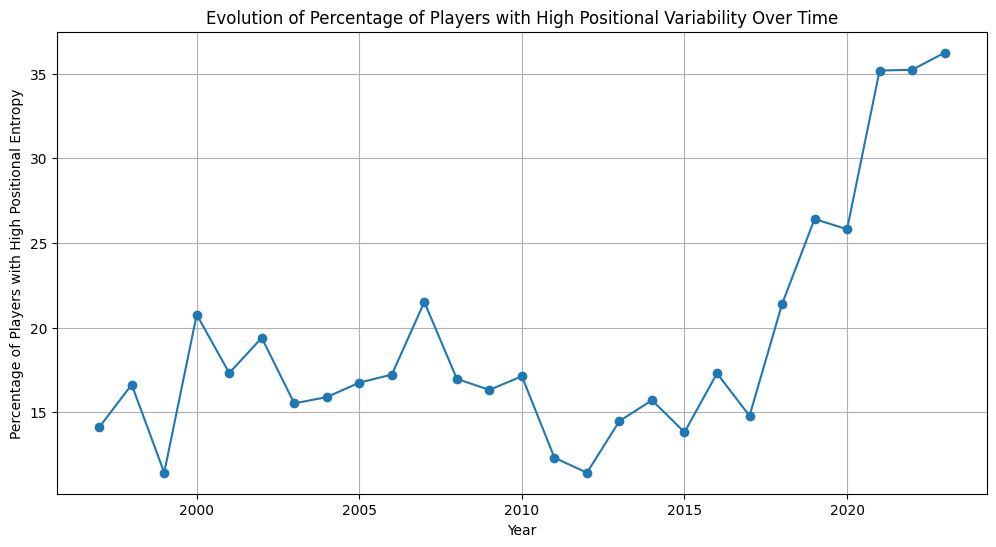

In [13]:
# Define a threshold for high positional variability
entropy_threshold = 1.0 # 1/2, 1/2

# Calculate the percentage of players with high positional variability for each year
yearly_percentage = {}
for year, df in dfs.items():
    df['PositionalEntropy'] = df.apply(calculate_positional_entropy, axis=1)
    high_entropy_players = df[df['PositionalEntropy'] > entropy_threshold]
    percentage = (len(high_entropy_players) / len(df)) * 100
    yearly_percentage[year] = percentage

# Create a DataFrame from the yearly percentage data
percentage_df = pd.DataFrame.from_dict(yearly_percentage, orient='index', columns=['PercentageHighEntropy'])
percentage_df.index.name = 'Year'

# Plot the percentage of players with high positional variability over time
plt.figure(figsize=(12, 6))
plt.plot(percentage_df.index, percentage_df['PercentageHighEntropy'], marker='o')
plt.xlabel('Year')
plt.ylabel('Percentage of Players with High Positional Entropy')
plt.title('Evolution of Percentage of Players with High Positional Variability Over Time')
plt.grid(True)
plt.show()

In [14]:
df

,Player,Age,Team,Pos,G,GS,MP,PG%,SG%,SF%,PF%,C%,PositionalEntropy,OriginalPosition
0,Mikal Bridges,26,2TM,SG,83,83,2963,1,38,51,10,0,1.424514,SF
1,Mikal Bridges,26,PHO,SF,56,56,2040,0,19,66,15,0,1.261416,SF
2,Mikal Bridges,26,BRK,SG,27,27,923,2,80,17,1,0,0.871445,SF
3,Anthony Edwards,21,MIN,SG,79,79,2842,1,65,32,3,0,1.151194,SG
4,Zach LaVine,27,CHI,SG,77,77,2768,25,43,32,1,0,1.614392,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,Alondes Williams,23,BRK,SG,1,0,5,0,100,0,0,0,0.000000,SG
675,Donovan Williams,21,ATL,SG,2,0,4,0,0,100,0,0,0.000000,SG
676,Chris Silva,26,DAL,PF,1,0,3,0,0,0,100,0,0.000000,PF
677,Stanley Umude,23,DET,SG,1,0,2,0,0,100,0,0,0.000000,SG


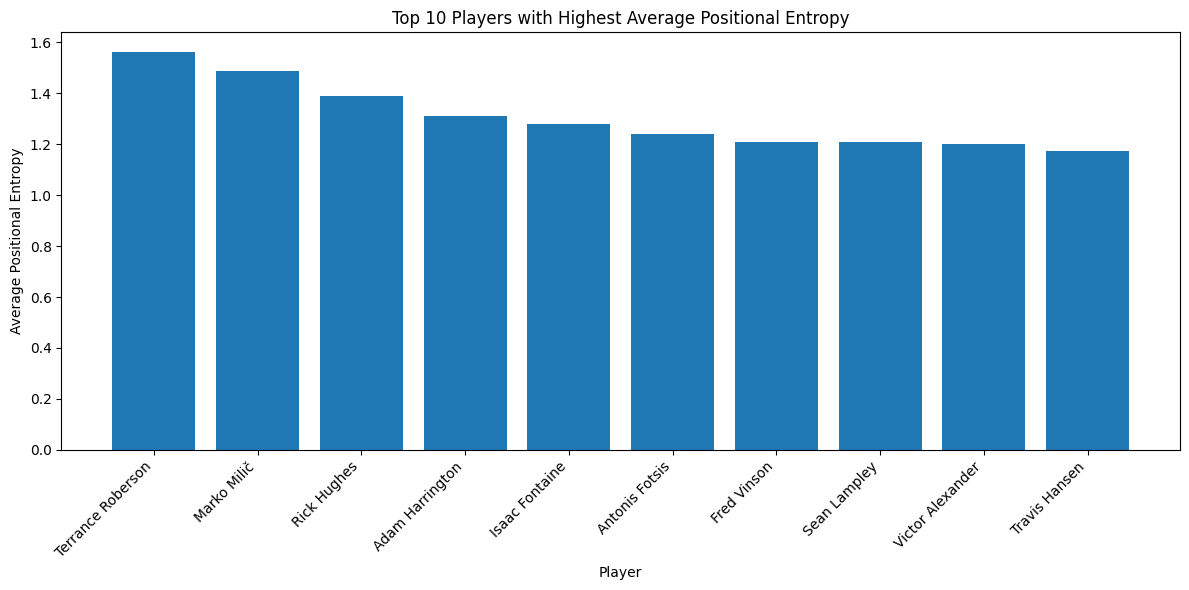

In [15]:
# Calculate the average positional entropy for each player across all seasons
player_entropy = {}
for year, df in dfs.items():
    df['PositionalEntropy'] = df.apply(calculate_positional_entropy, axis=1)
    for player in df['Player'].unique():
        if player not in player_entropy:
            player_entropy[player] = []
        player_data = df[df['Player'] == player]['PositionalEntropy']
        player_entropy[player].extend(player_data)

# Calculate the average positional entropy for each player
player_average_entropy = {player: np.mean(entropies) for player, entropies in player_entropy.items()}

# Sort the players by average positional entropy in descending order
sorted_players = sorted(player_average_entropy.items(), key=lambda x: x[1], reverse=True)

# Get the top N players
top_n = 10
top_players = sorted_players[:top_n]

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar([player for player, entropy in top_players], [entropy for player, entropy in top_players])
plt.xlabel('Player')
plt.ylabel('Average Positional Entropy')
plt.title(f'Top {top_n} Players with Highest Average Positional Entropy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

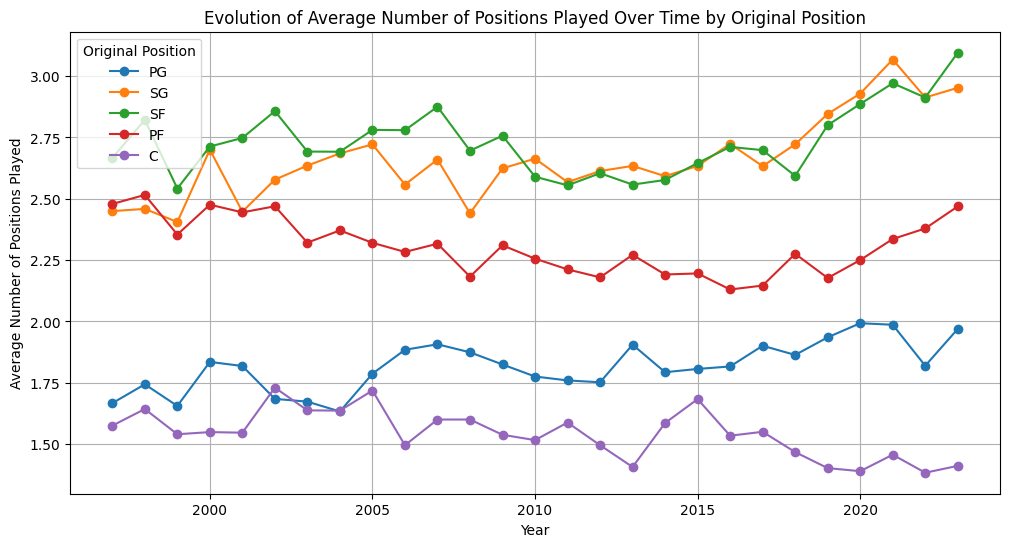

In [16]:
yearly_avg_positions = {}
for year, df in dfs.items():
    def count_positions_played(row):
        positions = ['PG%', 'SG%', 'SF%', 'PF%', 'C%']
        return sum(1 for pos in positions if row[pos] > 0)

    df['PositionsPlayed'] = df.apply(count_positions_played, axis=1)
    df['OriginalPosition'] = df['Player'].map(original_positions)  # Map original position to each row
    grouped = df.groupby('OriginalPosition')['PositionsPlayed'].mean()
    yearly_avg_positions[year] = grouped

# Create a DataFrame from the yearly average positions data
avg_positions_df = pd.DataFrame(yearly_avg_positions)
avg_positions_df.index.name = 'Original Position'

# Plot the average number of positions played over time for each original position
plt.figure(figsize=(12, 6))
position_order = ['PG', 'SG', 'SF', 'PF', 'C']

for position in position_order:
    if position in avg_positions_df.index:
        plt.plot(avg_positions_df.columns, avg_positions_df.loc[position], marker='o', label=position)

plt.xlabel('Year')
plt.ylabel('Average Number of Positions Played')
plt.title('Evolution of Average Number of Positions Played Over Time by Original Position')
plt.grid(True)
plt.legend(title='Original Position')
plt.show()

In [ ]:
# Matrix of how positions interact with each other - how much players for each position play other positions
